In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud

In [2]:
trainStances = pd.read_csv('train_stances.csv')
trainBodies = pd.read_csv('train_bodies.csv')
trainSet = pd.merge(trainStances, trainBodies, on='Body ID')
trainSet.head()

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Seth Rogen to Play Apple’s Steve Wozniak,712,discuss,Danny Boyle is directing the untitled film\n\n...
2,Mexico police find mass grave near site 43 stu...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
3,Mexico Says Missing Students Not Found In Firs...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
4,New iOS 8 bug can delete all of your iCloud do...,712,unrelated,Danny Boyle is directing the untitled film\n\n...


In [3]:
testStances = pd.read_csv('competition_test_stances.csv')
testBodies = pd.read_csv('competition_test_bodies.csv')
testSet = pd.merge(testStances, testBodies, on='Body ID')
testSet.head()

,Headline,Body ID,Stance,articleBody
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated,A RESPECTED senior French police officer inves...
1,Apple Stores to install safes to secure gold A...,2008,unrelated,A RESPECTED senior French police officer inves...
2,Pregnant woman loses eye after police shoot be...,2008,unrelated,A RESPECTED senior French police officer inves...
3,We just found out the #Ferguson Protester who ...,2008,unrelated,A RESPECTED senior French police officer inves...
4,Police Chief In Charge of Paris Attacks Commit...,2008,discuss,A RESPECTED senior French police officer inves...


[]

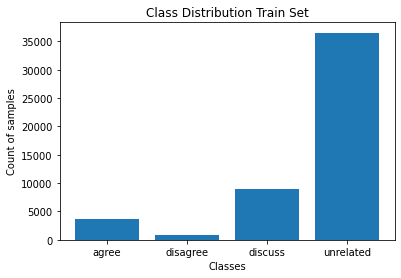

In [4]:
x = trainSet.groupby('Stance').count()
plt.title("Class Distribution Train Set")
plt.bar(x.index, x['Headline'])
plt.xlabel("Classes")
plt.ylabel("Count of samples")
plt.plot()

[]

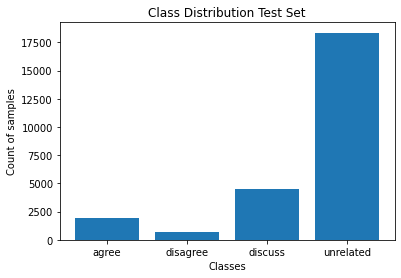

In [5]:
x = testSet.groupby('Stance').count()
plt.title("Class Distribution Test Set")
plt.bar(x.index, x['Headline'])
plt.xlabel("Classes")
plt.ylabel("Count of samples")
plt.plot()

In [14]:
def preprocessText(x):
    from nltk.corpus import stopwords
    engStpWords = stopwords.words('english')
    y = []
    # Remove extra spaces at start and at the end.
    x = x.strip()
    # Remove stopwords. (split at whitespace and \n)
    for token in re.split(r'\s+|\n', x):
        token = token.strip()
        if token not in engStpWords:
            y.append(token.lower())
    y = " ".join(y)
    # Remove extra spaces after joining
    y = y.strip()
    # Remove punctuations.
    y = y.translate(str.maketrans('', '', string.punctuation))
    return y

In [15]:
wholeTextTrain = ""
for _,x in trainSet.iterrows():
    wholeTextTrain += x['Headline'] + x['articleBody']

In [16]:
wholeTextTrain = preprocessText(wholeTextTrain)

In [18]:
wc = WordCloud(background_color='white').generate_from_text(wholeTextTrain)

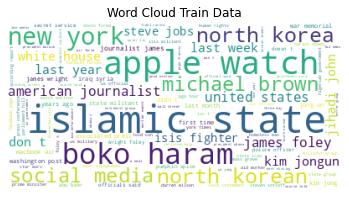

In [21]:
plt.title("Word Cloud Train Data")
plt.imshow(wc)
plt.axis('off')
plt.show()

In [22]:
wholeTextTest = ""
for _,x in testSet.iterrows():
    wholeTextTest += x['Headline'] + x['articleBody']

In [23]:
wholeTextTest = preprocessText(wholeTextTest)

In [24]:
wc = WordCloud(background_color='white').generate_from_text(wholeTextTest)

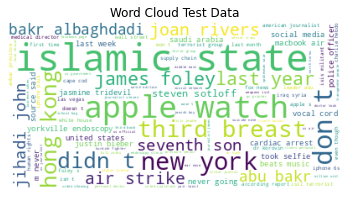

In [25]:
plt.title("Word Cloud Test Data")
plt.imshow(wc)
plt.axis('off')
plt.show()